# Problem Sheet 2

## 1. Model of Haemoglobin.

Haemoglobin, $Hb$, absorbs oxygen, $O_2$, to form an intermediate complex, $HbO_2$.  The complex then reacts with tissue, $T$, to form a product, $P$, releasing the haemoglobin.  The reactions are written 

\begin{align*}
Hb + O_2 &\underset{k}{\stackrel{k}{\rightleftharpoons}} HbO_2  \\
HbO_2 + T &\xrightarrow{k} Hb + P 
\end{align*}

where the reaction rates are all equal and scaled so that $k = 1$.  

The concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are $e, s, c,$ and $p$, respectively, while the tissue is present in such quantities that its concentration is $1$ for all time. The initial concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are respectively $e_0, s_0, 0$ and $0$.

1. Use the law of mass action to derive a system of ODE’s describing this reaction. Show that
$e(t) + c(t)$ is constant and equal to $e_0$. Use this to reduce the system to a system of two ODE’s
for the equations for $s(t$) and the complex, $c(t) = e_0v(t)$ in the form 

\begin{align*}
\frac{\text{d}s}{\text{d}t} = e_0(v − s(1 − v)), \\
\frac{\text{d}v}{\text{d}t} = s(1 − v) − 2v.
\end{align*}

2. Explain carefully the Michaelis-Menten quasi-steady approximation, and show that it implies that
$s(t)$ is given implicitly by 

\begin{align*}
s + 2 \log s = s_0 + 2 \log s_0 − e_0t .
\end{align*}

3. Deduce that for large times $s \approx s_0 \exp\big[ \frac{1}{2}(s_0 − e_0t)\big].$
4. Describe how $v$ changes in the very early stages of the reaction. *Hint: Use the fact that initially, $s = s_0$*

## 2. Mutual repressor model of a genetic switch

Considerable insight into genetic switches has been obtained by constructing a synthetic version of a switch in *E. coli* bacyeria, in which the gene product of the switch is a fluorescent reporter protein. This allows the flipping of the switch to be observed by measuring the fluorescent level of the cells. The underlying gene circuit is based on a mutual repressor model. It consists of two 
repressor proteins $X$ and $Y$ whose transcription is mutually regulated. That is, the protein product of one gene binds to the promoter of the other gene and represses its output. 

<img src="gene2.png" style="width: 600px;">

For simplicity, the explicit dynamics of transcription and translation are ignored so that we only model the mutual effects of the proteins on protein production. Denoting 
the concentrations of the proteins by 
$x(t),y(t)$, and assuming the two proteins act symmetrically, the resulting kinetic equations are
\begin{equation}
{\frac{dx}{dt}=-\gamma_p x+\frac{\kappa_pK^2}{K^2+ y^2},\qquad \frac{dy}{dt}=-\gamma_p y+\frac{\kappa_pK^2}{K^2 +x^2}.}
\end{equation}
Here $\gamma_p$ is the rate of protein degradation, $\kappa_p$ is the rate of protein production in the absence of repression, and $K$ is a binding constant for the 
repressors.

1. Show how to rewrite the equations in non-dimensional form by measuring $x $ and $y$ in units of $K^{-1}$ and time in units of $\gamma_p^{-1}$:
\begin{align}
\frac{du}{dt}&=-u+\frac{\alpha}{1+v^2},\qquad \frac{dv}{dt}- v+\frac{\alpha}{1+u^2},
\end{align}
with $\alpha = \kappa_p /K\gamma_p$.

2. Show that the fixed point equation for $u$ can be writtem in terms of a product of two polynomials:
\begin{equation}
(u^2-\alpha u+1)(u^3+u-\alpha)=0.
\end{equation}
Deduce that that there alsways exists a symmetric solution ($u=v$), and that there are an additional pair og fixed points when $\alpha> 2$. 

3. Use linear stability analysis 
to establish that the symmetric solution is 
stable when $\alpha <2$, and undergoes a pitchfork bifurcation at the critical value $\alpha_c=2$ where it becomes unstable and a pair of stable fixed points emerge. 

## 3. Predator prey system

Consider the ODE

\begin{align*}
\frac{\text{d}N}{\text{d}t} &= \rho N\bigg( 1-\frac{N}{K} \bigg) - \gamma P f(N), \qquad
\frac{\text{d}P}{\text{d}t} = P(\sigma f(N) - \eta)
\end{align*}

where $N(t)$ are the number of prey and $P(t)$ the number of predators, which we assume to vary
continuously in time. The parameters $K, \rho, \gamma, \sigma, \eta$ are positive constants. Let

\begin{align*}
f(N) = \frac{N}{N+D}.
\end{align*}

1. What assumptions are made on the per-predator rate of predation, $\gamma f(N)$, when choosing $f(N)$
as above? Hint: Consider the behaviour of $\gamma f(N)$ for large and small values of $N$.

2. Show that non-dimensionalisation of the form $\tau= \rho t$, $u = N/K$, $v = P \gamma/(\rho K)$ produces the
system

\begin{align}
\frac{\text{d}u}{\text{d}\tau} &= u(1-u) - \frac{uv}{u+\delta} \qquad
\frac{\text{d}v}{\text{d}\tau} = v \bigg( \lambda \frac{u}{u+\delta} - \mu \bigg) 
\end{align}

and state the values of the positive parameters $\lambda, \delta, \mu$.


3. Assuming that $u \geq 0$ and $v \geq 0$, show that $(u, v) = (0, 0)$ and $(u, v) = (1, 0)$ are always steady
states. Show also that if $\lambda > \mu$ and $\lambda > \mu(1 + \delta)$ then there is an additional steady state

\begin{align*}
(u^*, v^*) = \bigg( \frac{\mu \delta}{\lambda - \mu} \,, \frac{\lambda \delta}{(\lambda - \mu)^2} (\lambda - \mu(1+\delta)) \bigg).
\end{align*}


4. Show that if $(u^∗, v^∗)$ is a steady state then the other two fixed points are unstable.


5. Show that at $(u^∗, v^∗)$, the Jacobian matrix of the system is

\begin{align*}
J = \begin{pmatrix}
1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta} & \frac{-u^*}{u^* + \delta}\\
\delta \lambda \frac{(1-u^*)}{u^*+\delta} & 0
\end{pmatrix}
\end{align*}

and that $(u^∗, v^∗)$ is stable if $(1 + \delta)\mu > \lambda(1−\delta)$. 

Hint: When calculating the Jacobian you may find it useful to recall the equation satisfied by $u^∗$ and also write $v^∗$ in terms of $u^∗$.

## 4. Leaky integrate-and-fire model of a neuron

The *leaky integrate-and-fire* (LIF) model provides a
caricature of the capacitative nature of cell membrane at the expense of a detailed model of the refractory process (due to hyperpolarization via potassium currents). The simplest form is given by the equation
\begin{align}
C \frac{dV}{dt} = g_L(V_L-V) +I,
\end{align}
where $C$ is membrane capacitance, $g_L$ is a conductance, $V_L$ is a reversal potential and $I$ is an external current. This is
supplemented by the reset condition
\begin{align}
V(t) = 0 \quad \mbox{whenever} \quad V(t_-) = V_{\kappa},
\end{align}
where $V_{\kappa}$ is the firing threshold. Here $V(t_-)=\lim_{\epsilon \rightarrow 0}V(t-\epsilon)$ where $\epsilon $ is positive. Let $C/g_L = \tau_L$ and non-dimensionalize time by redefining $t\rightarrow  t/\tau_L$. Finally, redefining the current according to $I
\rightarrow V_L+ I/g_L$ leads to the rescaled equation
\begin{align}
 \frac{dV}{dt} = -V +I
\end{align}
For simplicity we also set $V_{\kappa} =1$. which is equivalent to rescaling $V$ and $I$.

1. Suppose that $I=I_0>1$ and $V(0)=0$. Let $T_0$ be the time for the potential to reach threshold, $V(T_0) =1$. By solving the above equation over the interval $[0,T_0)$ derive an explicit expression for $T_0$.
Hence, establish that the solution is a piecewise continuous oscillation with period $T_0$. Why does this not contradict our previous 1D system analysis?

2. Explain what happens when $I=I_0 <1$. (This is a simple model of an excitable cell.)

3. Suppose that $I=I_0+\epsilon i(t)$ with $I_0>1$ so that between resets
\begin{eqnarray*}
\frac{dV}{dt}= f(V)+\epsilon i(t)\quad f(V)=I_0-V.
\end{eqnarray*}
Introduce the phase variable
\begin{eqnarray*}
\theta(t) =  \frac{1}{T_0}\int_0^V \frac{dx'}{f(x')} \nonumber
\end{eqnarray*}
Show that $\theta$ evolves according to an equation of the form
\begin{eqnarray}
\frac{d\theta(t)}{dt} = \frac{1}{T_0}+ \varepsilon R(\theta)I(t)\nonumber
\end{eqnarray}
and calculate $R(\theta)$.

4. Use the code below to explore the behavior of the LIF as a function of the constant input $I_0$ for $\epsilon =0$. Explore what happens when $\epsilon >0$. with $i(t)=\cos(w t)$


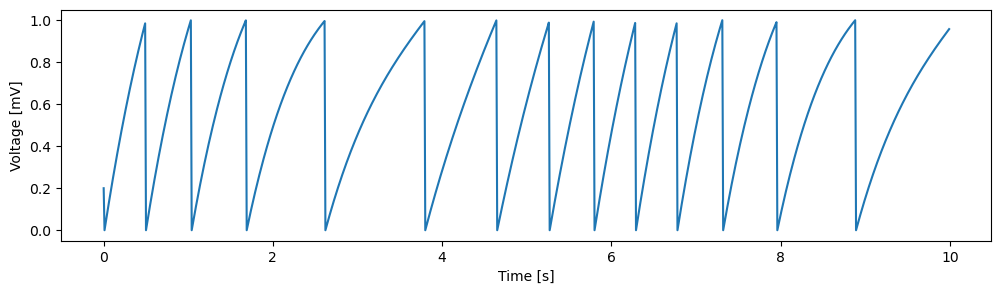

In [6]:
import math
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3) # Change the default figure size

I=0.5                          #Set the input  parameter I.
epsilon=0                          #Set the amplitude of sinusoid.
w=1                          #Set the frequency of the sinusoid.
 
Vth = 1;                     #Define the voltage threshold.
Vreset = 0;                  #Define the reset voltage.
dt=0.01                      #Set the timestep.
V = zeros([1000,1])          #Initialize V.
V[0]=0.2;                    #Set the initial condition.

for k in range(1,999):       #March forward in time,
    V[k+1] = (1-dt)*V[k] + (1+epsilon*cos(w*k*dt))*dt*I #Update the voltage,
    if V[k+1] > Vth:         #... and check if the voltage exceeds the threshold.
        V[k+1] = Vreset
        
t = arange(0,len(V))*dt      #Define the time axis.

figure()                     #Plot the results.
plot(t,V)
xlabel('Time [s]')
ylabel('Voltage [mV]');